In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
path = '/Users/bounaanourndiaye/Desktop/Jupiter Notebooks/Heart Disease/heart-disease.csv'
data = pd.read_csv(path)

In [5]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
X = data.drop("target",axis=1)
y = data["target"]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
X_train.shape,X_test.shape,y_test.shape,y_train.shape

((242, 13), (61, 13), (61,), (242,))

## Make sure data is numerical 

# First way using OneHotEncoder Method 

In [10]:
path_file = '/Users/bounaanourndiaye/Desktop/Jupiter Notebooks/Heart Disease/car-sales-extended.csv'
car_data = pd.read_csv(path_file)

In [11]:
car_data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [12]:
# 2 ways to make categorical into number
# First one is by using the OneHotEncoder functiomn 

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

X = car_data.drop('Price',axis=1)
y = car_data['Price']
categorical_features = ["Make","Colour",'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],
                                remainder="passthrough")
transformed_X = transformer.fit_transform(X)

In [14]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [15]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [16]:
## Now we have all numerical into our data.


# Second way using getDummy Method 

In [17]:
dummies = pd.get_dummies(car_data[['Make','Colour','Doors']])

In [18]:
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [19]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train,y_train)



RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [20]:
model.score(X_test,y_test)

0.26080594863399864

## What if there were missing values ?
1. We could fill them with some values (alsow known as imputation).
2. remove the sample with missing data altogether.
3. Create a ml to predict those missing values.

In [21]:
path_file_missing_data = '/Users/bounaanourndiaye/Desktop/Jupiter Notebooks/Heart Disease/car-sales-extended-missing-data.csv'
car_sales_missing = pd.read_csv(path_file_missing_data)

In [22]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [23]:
## we will fill missing data with Pandas 

In [24]:
# Fill the Make column
car_sales_missing["Make"].fillna('missing',inplace=True)

In [25]:
# Fill the Colour column
car_sales_missing['Colour'].fillna('missing',inplace=True)

# Fill the Odomether column
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(),inplace=True)

In [26]:
# Fill the Doors column
car_sales_missing['Doors'].fillna(4,inplace=True)

In [27]:
car_sales_missing.isnull().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [28]:
# Remove rows with missing Price value

In [29]:
car_sales_missing.dropna(inplace=True)
len(car_sales_missing)

950

In [30]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

X = car_sales_missing.drop('Price',axis=1)
y = car_sales_missing['Price']
categorical_features = ["Make","Colour",'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],
                                remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_missing)

In [31]:

## Option 2 : filling missing values with scikit learn 
car_sales_missing_.columns

NameError: name 'car_sales_missing_' is not defined

In [ ]:
car_sales_missing_ = pd.read_csv(path_file_missing_data)

In [ ]:
#Drop tow with no values
car_sales_missing_.dropna(subset=['Price'],inplace=True)
car_sales_missing_.isna().sum()

In [ ]:
# split into X & y

In [ ]:
X = car_sales_missing_.drop('Price',axis=1)
y = car_sales_missing_["Price"]

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with "missing" and numerical values with mean 

cat_imputer = SimpleImputer(strategy='constant',fill_value='missing')
door_imputer = SimpleImputer(strategy='constant',fill_value=4)
num_imputer = SimpleImputer(strategy='mean')


# Define columns
cat_features = ['Make','Colour']
door_features = ["Doors"]
num_features = ['Odometer (KM)']


# Create an imputer (something that filss missing data)

imputer = ColumnTransformer([("cat_features",cat_imputer,cat_features),
                             ("door_imputer",door_imputer,door_features),
                             ("num_imputer",num_imputer,num_features)
                            ])

# tranform the data 

filled_X = imputer.fit_transform(X)
filled_X

In [ ]:
car_sales_filled = pd.DataFrame(filled_X,
                                columns=['Make','Colour','Doors','Odometer (KM)'])
car_sales_filled

In [32]:
car_sales_filled.isna().sum()

NameError: name 'car_sales_filled' is not defined

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


categorical_features = ["Make","Colour",'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],
                                remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_filled)

In [ ]:
#Now we got our data as number and filled 
# lets fit our model 

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

In [33]:
#Filling value = imputation
#non numerical to numerical value =  features enginaring or future encoding

## How do we know what is the right estimator/algorithm four our problem

Scikit - learn uses estimator whether as another term for machine learning or algorithm.
1. Classification - predicting whether a sample is one thing or another 
2. Regression - predicting a number 

In [34]:
#import boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston;

In [35]:
boston_df = pd.DataFrame(boston["data"],columns=boston["feature_names"])
boston_df['target'] = pd.Series(boston['target'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Following thee schikit learn algorithm, let's assume that 
#the regression model is not working, we will try the RidgeRegression
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [36]:


# Let's try the Ridge Regression Model
from sklearn.linear_model import Ridge

np.random.seed(42)
x = boston_df.drop('target',axis=1)
y = boston_df['target']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [38]:
model = Ridge()
model.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [39]:
model.score(X_test,y_test)

0.6662221670168518

In [40]:
#If the Ridge Regression is not working, 
# let's try EnsembleMethods - RandomForrest

In [41]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop('target',axis=1)
y = boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [42]:
#Let's valuate 
rf_model.score(X_test,y_test)

0.873969014117403

Based of our the machine learning map from scikit, we are able

to improve the score of the same dataset with different model. 

The Ridge model sacore is 0.7753 and RandomRegressor score is 0,8739

# Choosing an estimator for a classification problem 
Using the scikit map : https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html,
We will try the LinearSVC

In [43]:
heart_disease = pd.read_csv(path)
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [44]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification

np.random.seed(42)

X = heart_disease.drop('target',axis=1)
y = heart_disease['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearSVC()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

/Users/bounaanourndiaye/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.47540983606557374

In [45]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)


0.8524590163934426

## Fit the model on our data and use it to make predictions
Fit function is just to go thru all the exemples of X and see what they conrresponding on Y label and find pattern 

In [46]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target',axis=1)
y = heart_disease['target']

# split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate Random Forest Classifirer
clf = RandomForestClassifier(n_estimators=1000)

#fit the model data 
clf.fit(X_train,y_train)

#Evaluate
clf.score(X_test,y_test)

0.8688524590163934

## Make predictions 

2 ways to make predictions:
1. Predict function
2. predict_proba function 

In [47]:
# Use a trained model to make prediction 
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [48]:
np.array([y_test])

array([[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]])

In [49]:
# Compare preidctions to truth labels to evaluate the model 
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8688524590163934

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8688524590163934

In [51]:
# Make prediction using predict_proba
#It will display the probability of the classes


clf.predict_proba(X_test[:4])


array([[0.894, 0.106],
       [0.435, 0.565],
       [0.455, 0.545],
       [0.871, 0.129]])

In [52]:
#0.894 proba to be a class 0 and 0.106 to be class 1

In [53]:
#let's predict on the same data...
clf.predict(X_test[:4])

array([0, 1, 1, 0])

## Regression Estimator

In [54]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [55]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X = boston_df.drop('target',axis=1)
y = boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
y_predict[:10]

array([23.002, 30.826, 16.734, 23.467, 16.853, 21.725, 19.232, 15.239,
       21.067, 20.738])

In [56]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [57]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_predict)

2.1226372549019623

## Evaluating a model 
From the sckit documentation we have 3 ways:
1. Estimator 'score' method 
2. The 'scoring' parameter 
3. Problem-specific metric function 

In [58]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target',axis=1)
y = heart_disease['target']

# split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate Random Forest Classifirer
clf = RandomForestClassifier(n_estimators=1000)

#fit the model data 
clf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [59]:
#Evaluate
clf.score(X_train,y_train)

1.0

In [60]:
clf.score(X_test,y_test)

0.8688524590163934

In [61]:
# The scoring method 

In [62]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target',axis=1)
y = heart_disease['target']

# split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate Random Forest Classifirer
clf = RandomForestClassifier(n_estimators=1000)

#fit the model data 
clf.fit(X_train,y_train)



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [63]:
clf.score(X_test,y_test)

0.8688524590163934

In [64]:
cross_val_score(clf,X,y,cv=5)

array([0.83606557, 0.90163934, 0.81967213, 0.8       , 0.78333333])

In [65]:
cross_val_score(clf,X,y,cv=10)

array([0.87096774, 0.83870968, 0.83870968, 0.9       , 0.9       ,
       0.83333333, 0.73333333, 0.83333333, 0.73333333, 0.83333333])

In [66]:
# The cross validation will give the score of 5 different version of training data and 
# evaluated on 5 diffrent versions of the test data

In [67]:
np.random.seed(42)

#single training test split score 
clf_single_score = clf.score(X_test,y_test)

#take the mean of 5-fold cross validation score 
clf_cross_val_score = np.mean(cross_val_score(clf,X,y,cv=5))

# compare the two
clf_single_score, clf_cross_val_score

(0.8688524590163934, 0.8215300546448088)

In [68]:
# Default scoring parameter of classifier = mean accuracy 
clf.score()

TypeError: score() missing 2 required positional arguments: 'X' and 'y'

In [69]:
# Scoring parameter set to none by default 
cross_val_score(clf,X,y,cv=5,scoring=None)

array([0.83606557, 0.8852459 , 0.80327869, 0.8       , 0.76666667])

### Classification model evaluation metrics 
1. Accuracy 
2. Area under ROC Curve
3. Confusion matrix
4. Classification report 

## Accuracy 

In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


np.random.seed(42)


X = heart_disease.drop('target',axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf,X,y,cv=5)

In [71]:
np.mean(cross_val_score)

0.8248087431693989

In [72]:
print(f"Heart Disease Classifier Cross valided Accuracy: {np.mean(cross_val_score) *100:.2f}%")

Heart Disease Classifier Cross valided Accuracy: 82.48%


In [73]:
# We hust used the cross val score since it will take default evaluation of our estimator 
# in this case for a classification, accuracy will be the default 

**Area under receiver operating characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate vs False positive rate .

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True  negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [74]:
from sklearn.metrics import roc_curve

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf.fit(X_train,y_train)

# Make predictions with probabilities 
y_probs = clf.predict_proba(X_test)
y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [75]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [76]:
# calculate fpr, tpr and thresholds 
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

#  fpr 
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

In [77]:
# Plot ROC curves 

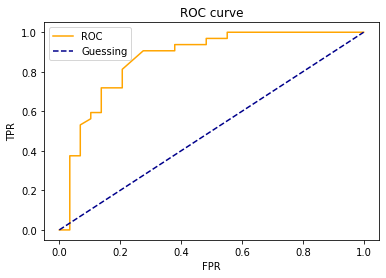

In [78]:
def plot_roc_curve(fpr,tpr):
    """
    Plots a ROC curve given the false positive (fpr)
    and true positives rate(tpr) of a model.
    """
    
    # plot roc curve
    plt.plot(fpr, tpr, color="orange", label='ROC')
    
    #plot line with no predictive power(baseline)
    
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle= '--', label='Guessing')
    
    #customize the plot
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [79]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

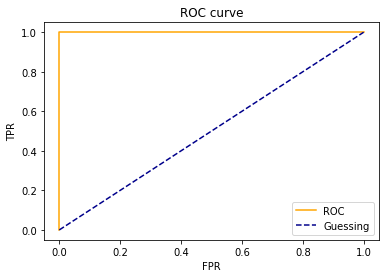

In [80]:

fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [81]:
# Perfect AUC Score
roc_auc_score(y_test, y_test)

1.0

# Confusion matrix 

Quick way to compare the labels a model predicts and the actual labels it was supposed to predicts.

In [82]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test,y_preds)

array([[23,  6],
       [ 6, 26]])

In [83]:
# visualize confusion matrix with pd.crosstab()

pd.crosstab(y_test,
           y_preds,
           rownames=['Actual labels'],
           colnames=['Predicted labels'])

Predicted labels,0,1
Actual labels,,
0,23,6
1,6,26



# Classification Report 

Scikit:

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



### Regression model evaluation Metrics

Model evaluation metrics documentation -  https://scikit-learn.org/stable/modules/model_evaluation.html
1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

# R^2
compareds your model predictions to the mean of the targets. Values can range from negative infinity(very poor) to 1. For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model prefectly predicts a range of number it's R^2 would be 1.

In [85]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop('target',axis=1)
y = boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train,y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [86]:
model.score(X_test,y_test)

0.873969014117403

# Mean absolute error (MAE)

In [87]:
from sklearn.metrics import mean_absolute_error
y_preds = model.predict(X_test)


mae = mean_absolute_error(y_test,y_preds)
mae

2.1226372549019623

In [88]:
df = pd.DataFrame(data={"actual values": y_test,
                       "predicted values": y_preds})
df['differences'] = df['predicted values'] - df['actual values']
df

,actual values,predicted values,differences
173,23.6,23.002,-0.598
274,32.4,30.826,-1.574
491,13.6,16.734,3.134
72,22.8,23.467,0.667
452,16.1,16.853,0.753
...,...,...,...
412,17.9,13.030,-4.870
436,9.6,12.490,2.890
411,17.2,13.406,-3.794
86,22.5,20.219,-2.281


# Mean squarred error (MSE)

In [89]:
from sklearn.metrics import mean_squared_error
y_preds = model.predict(X_test)


mse = mean_squared_error(y_test,y_preds)
mse

9.242328990196082

In [90]:
squared = np.square(df['differences'])
squared.mean()

9.24232899019608

# Using the scoring parameter

In [91]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

In [92]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [93]:
# Cross-validated accuracy
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is: 82.48%


In [94]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is: 82.48%


In [95]:
# Precision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
np.mean(cv_precision)

0.8085601538512754

In [96]:
# Recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
np.mean(cv_recall)

0.8424242424242424

In [97]:
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
np.mean(cv_f1)

0.841476533416832

How about our regression model?


In [98]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

model = RandomForestRegressor(n_estimators=100)

In [99]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring=None)
np.mean(cv_r2)

0.622375083951403

In [100]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring="r2")
np.mean(cv_r2)

0.622375083951403

In [101]:
# Mean absolute error
cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
cv_mae

array([-2.12751961, -2.53956436, -3.42026733, -3.82432673, -3.06893069])

In [102]:
# mean MAE
np.mean(cv_mae)

-2.9961217433508045

In [103]:
# Mean squared error
cv_mse = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
cv_mse

array([ -7.77433365, -12.76515461, -19.26965413, -46.20221782,
       -19.10133112])

In [104]:
np.mean(cv_mse)

-21.02253826604542

## 5. Improving a model 

first predictions = baseline preditions
first model = baseline model

from a data perspective:
* Could we collect more data? (generally, the more data, the better)
* Could improve our data ? 

from a model perspective:
* Is there a better model to use ?
* Could we improve the current model ?


Hyperparameters vs Parameters
* Parameters = model find these patterns in data 
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability

Three ways to adjust Hyperparamters:
1. By hand 
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [105]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)



In [106]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning  Hyperparameters By Hand
Let's make 3 sets, training, validation and test 

We're going to try and adjust:
*  'max_depth': None,
*  'max_features': 'auto',
*  'min_leaf_nodes',
*  'min_samples_split'
*  'n_estimators'

In [107]:
def evaluate_preds(y_true,y_preds):
    """""
    Performs evaluation comparion on y_true labels vs y_preds labels
    on a classification
    """""
    
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1,2)}
        
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision: .2f}")
    print(f"Precision: {recall: .2f}")
    print(f"F1: {f1: .2f}")
    
    return metric_dict

In [108]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#shuffle data
heart_disease_shuffled = heart_disease.sample(frac=1)

X = heart_disease_shuffled.drop('target',axis=1)
y = heart_disease_shuffled['target']


# split data into train, validation and test sets
train_split = round(0.7 * len(heart_disease_shuffled)) #70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))#15%
X_train,y_train = X[:train_split], y[:train_split]
X_valid,y_valid = X[train_split:valid_split],  y[train_split:valid_split]
X_test, y_test= X[valid_split:], y[valid_split:]


clf = RandomForestClassifier()
clf.fit(X_train,y_train)

# Baseline predictions
y_preds = clf.predict(X_valid)

#Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid,y_preds)
baseline_metrics


Acc: 82.22%
Precision:  0.81
Precision:  0.88
F1:  0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [109]:
np.random.seed(42)

# Create a second classifier with different hyperparamters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train,y_train)


y_preds_2 = clf_2.predict(X_valid)

# Evaluate the 2nd classifier 
clf_2_metrics = evaluate_preds(y_valid,y_preds_2)

Acc: 82.22%
Precision:  0.84
Precision:  0.84
F1:  0.84


# 5.2 Hyperparameter tuning with RandomizedSearchcv

In [110]:
from sklearn.model_selection import RandomizedSearchCV


grid = {"n_estimators": [10, 100, 200, 1000, 12000],
        'max_depth': [None, 5, 10, 20, 30],
        'max_features': ["auto", "sqrt"],
        'min_samples_leaf': [2, 4, 6],
        'min_samples_split' : [1, 2, 4]
       }
np.random.seed(42)

# Split into x and y 

X = heart_disease_shuffled.drop('target',axis=1)
y = heart_disease_shuffled['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


clf = RandomForestClassifier(n_jobs=1)

#setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf, 
                           param_distributions=grid,
                           n_iter=10,# nber of models to try
                           cv=5,
                           verbose=2)

# Fit the RandomizedSearchCV version of clf 
rs_clf.fit(X_train, y_train);


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=10, min_samples_split=1, min_samples_leaf=6, max_features=auto, max_depth=5 
[CV]  n_estimators=10, min_samples_split=1, min_samples_leaf=6, max_features=auto, max_depth=5, total=   0.0s
[CV] n_estimators=10, min_samples_split=1, min_samples_leaf=6, max_features=auto, max_depth=5 
[CV]  n_estimators=10, min_samples_split=1, min_samples_leaf=6, max_features=auto, max_depth=5, total=   0.0s
[CV] n_estimators=10, min_samples_split=1, min_samples_leaf=6, max_features=auto, max_depth=5 
[CV]  n_estimators=10, min_samples_split=1, min_samples_leaf=6, max_features=auto, max_depth=5, total=   0.0s
[CV] n_estimators=10, min_samples_split=1, min_samples_leaf=6, max_features=auto, max_depth=5 
[CV]  n_estimators=10, min_samples_split=1, min_samples_leaf=6, max_features=auto, max_depth=5, total=   0.0s
[CV] n_estimators=10, min_samples_split=1, min_samples_leaf=6, max_features=auto, max_depth=5 
[CV]  n_estimators=10, m

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/bounaanourndiaye/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/Users/bounaanourndiaye/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/bounaanourndiaye/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation

[CV]  n_estimators=100, min_samples_split=1, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=

/Users/bounaanourndiaye/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/bounaanourndiaye/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=6, max_features=sqrt, max_depth=10, total=   0.3s
[CV] n_estimators=1000, min_samples_split=1, min_samples_leaf=6, max_features=sqrt, max_depth=10 


/Users/bounaanourndiaye/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=6, max_features=sqrt, max_depth=10, total=   0.3s
[CV] n_estimators=1000, min_samples_split=1, min_samples_leaf=6, max_features=sqrt, max_depth=10 


/Users/bounaanourndiaye/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=6, max_features=sqrt, max_depth=10, total=   0.3s
[CV] n_estimators=1000, min_samples_split=1, min_samples_leaf=6, max_features=sqrt, max_depth=10 


/Users/bounaanourndiaye/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=6, max_features=sqrt, max_depth=10, total=   0.4s
[CV] n_estimators=1000, min_samples_split=1, min_samples_leaf=6, max_features=sqrt, max_depth=10 


/Users/bounaanourndiaye/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=6, max_features=sqrt, max_depth=10, total=   0.4s
[CV] n_estimators=1000, min_samples_split=1, min_samples_leaf=6, max_features=auto, max_depth=30 


/Users/bounaanourndiaye/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=6, max_features=auto, max_depth=30, total=   0.3s
[CV] n_estimators=1000, min_samples_split=1, min_samples_leaf=6, max_features=auto, max_depth=30 


/Users/bounaanourndiaye/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=6, max_features=auto, max_depth=30, total=   0.4s
[CV] n_estimators=1000, min_samples_split=1, min_samples_leaf=6, max_features=auto, max_depth=30 


/Users/bounaanourndiaye/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=6, max_features=auto, max_depth=30, total=   0.3s
[CV] n_estimators=1000, min_samples_split=1, min_samples_leaf=6, max_features=auto, max_depth=30 


/Users/bounaanourndiaye/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=6, max_features=auto, max_depth=30, total=   0.3s
[CV] n_estimators=1000, min_samples_split=1, min_samples_leaf=6, max_features=auto, max_depth=30 


/Users/bounaanourndiaye/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=6, max_features=auto, max_depth=30, total=   0.3s
[CV] n_estimators=12000, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=5 
[CV]  n_estimators=12000, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=5, total=  13.0s
[CV] n_estimators=12000, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=5 
[CV]  n_estimators=12000, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=5, total=  13.3s
[CV] n_estimators=12000, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=5 
[CV]  n_estimators=12000, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=5, total=  13.2s
[CV] n_estimators=12000, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=5 
[CV]  n_estimators=12000, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=5, total=  13.8s
[CV] n_estimators=12000, min_samples_split=

/Users/bounaanourndiaye/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/bounaanourndiaye/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/bounaanourndiaye/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_sample

[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   0.0s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   0.0s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=30 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=30, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=30 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=30, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=6

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished


In [111]:
rs_clf.best_params_

{'n_estimators': 12000,
 'min_samples_split': 2,
 'min_samples_leaf': 6,
 'max_features': 'auto',
 'max_depth': 5}

In [112]:
#Make predictions with the best hyperparams
rs_y_preds = rs_clf.predict(X_test)

#Evaluate the predictions
rs_metrics = evaluate_preds(y_test,rs_y_preds)

Acc: 83.61%
Precision:  0.78
Precision:  0.89
F1:  0.83


# 5.3 Hyperparameter tuning with GridSearchCV

In [113]:
grid

{'n_estimators': [10, 100, 200, 1000, 12000],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [2, 4, 6],
 'min_samples_split': [1, 2, 4]}

In [114]:
# We reduced our search space of hyperparam based on the best parameter from RandomizedSearchCV
grid_2 = {'n_estimators': [1200],
          'max_depth': [5],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [2],
          'min_samples_leaf': [6]}

In [115]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# # Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# # Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                     param_grid=grid_2, 
                       cv=5,
                       verbose=2)

# Fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=1200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=1200, total=   1.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=1200 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=1200, total=   1.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=1200, total=   1.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=1200, total=   1.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=1200, total=   1.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=1200, total=   1.4s
[CV] max_depth=5, max_features=sqrt, min_samples_lea

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   13.2s finished


In [116]:
gs_clf.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'n_estimators': 1200}

In [117]:
gs_y_preds = gs_clf.predict(X_test)

# evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 81.97%
Precision:  0.76
Precision:  0.89
F1:  0.82


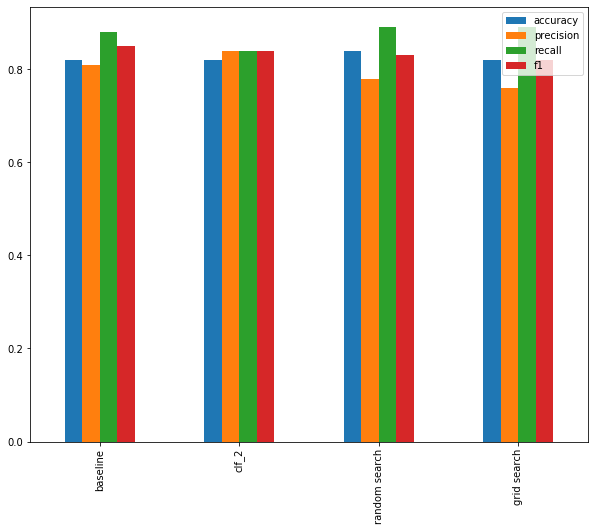

In [118]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})

compare_metrics.T.plot.bar(figsize=(10, 8));


# 6. Saving and loading trained machine learning models
Two ways to save and load machine learning models:

1. With Python's pickle module
2. With the joblib module

# Pickle

In [119]:
    import pickle 
    
    # Save an extisting model to file
    pickle.dump(gs_clf, open('gs_random_forest_model_1.pkl','wb'))